# Phys 404- Spring 2021
## Homework #6 ODE- Boundary Value Problem

Write a shooting method to calculate the Legendre polynomials with n=5
- We make explicit use of the well-defined parity of the Legendre 
polynomials and, taking into account their alternatively symmetric and 
antisymmetric character (determined by the independence of the ODE 
on the sign of x), the integration domain can be reduced from [−1, 1] to 
[0, 1]. So the equation is reduced to

\begin{equation}
y''=\frac{1}{1-x^2}[2xy'-n(n+1)y],
\end{equation}


$$y(0)=0 \text{,   } y'(0)=y'_a \text{,   } n=1,3,...$$


- Vary \$y’(0)\$ until \$y(1)=1\$ with bisection method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Functions:

In [2]:

def f(t, y, n=5):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=(2.*x*y[1]-n*(n+1)*y[0])/(1-x*x)
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

def cd(t, h, y):
    y+=(f(t+h/2., y)-f(t-h/2.,y))/h/h
    return y

### The final result will be y'=1.875 as see below:
The blue line is the final correct value of vy. The red dashed line is the vy min, and the green dash-dot line is the vy max that the bisection method will vary between.

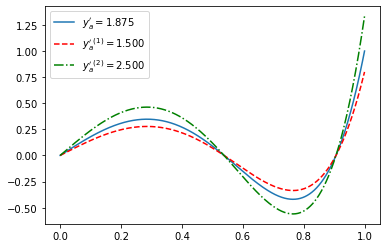

In [3]:

vy0=1.875
vy1=1.500
vy2=2.500

h=1.e-4

x=0.
xend=1
eps=1.e-8

xp0=[]
yp0=[]
y=[0.,vy0]
x=0.
while(x<xend-h):
    y = rk4(x,h,y,2)
    xp0=np.append(xp0,x)
    yp0=np.append(yp0,y[0])
    x = x+h

xp1=[]
yp1=[]
y=[0.,vy1]
x=0.
while(x<xend-h):
    y = rk4(x,h,y,2)
    xp1=np.append(xp1,x)
    yp1=np.append(yp1,y[0])
    x = x+h

xp2=[]
yp2=[]
y=[0.,vy2]
x=0.
while(x<xend-h):
    y = rk4(x,h,y,2)
    xp2=np.append(xp2,x)
    yp2=np.append(yp2,y[0])
    x = x+h

plt.show()
plt.plot(xp0,yp0)
plt.plot(xp1,yp1, 'r--')
plt.plot(xp2,yp2, 'g-.')
plt.legend(["$y_a'=1.875$", "$y_a'^{(1)}=1.500$", "$y_a'^{(2)}=2.500$"])
plt.show()

## Implementation of the Bisection Method to determine vy.

iter 0, shoot point: 1.0653016277771281, vy:14.3305758833287 target: 1.0
iter 1, shoot point: 0.9321389243049851, vy:12.539253897925827 target: 1.0
vy: 1.875, x: 0.9999999999999062, y: 0.9987202760410572


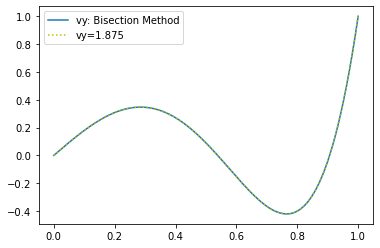

In [11]:

vy=1.6
h=1.e-4

target_x=1.
target_y=1.
x=0.
xend=1
eps=1.e-8

vymin=1.5
vymax=2.5
maxiter=100
for iter in range(maxiter):
    xp=[]
    yp=[]
    vy=(vymin+vymax)/2. # Finds the midpoint between the vmin and vmax
    y=[0.,vy]
    x=0.
    while(x<xend-h):
        y = rk4(x,h,y,2)
        xp=np.append(xp,x)
        yp=np.append(yp,y[0])
        x = x+h
        
    if(np.abs(y[0]-target_y)<0.01):#Overshot the x-limit
        break
    if y[0]<target_y:
        vymin=vy
    else:
        vymax=vy
    print(f"iter {iter}, shoot point: {y[0]}, vy:{y[1]} target: {target_y}")

print(f"vy: {vy}, x: {x}, y: {y[0]}")
plt.show()
plt.plot(xp,yp)
plt.plot(xp0,yp0, 'y:')
plt.legend(['vy: Bisection Method', 'vy=1.875'])
plt.show()